1.Uruchomić

    naive_multiplication(A,B),
    better_multiplication(A,B)
    mnożenie BLAS w Julii (A*B)

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru
macierzy wraz z słupkami błędów,
tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.

In [6]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [31]:
# sizeOf = Int[]
# type = []
# probe1 = Float64[]
# probe2 = Float64[]
# probe3 = Float64[]
# probe4 = Float64[]
# probe5 = Float64[]
# probe6 = Float64[]
# probe7 = Float64[]
# probe8 = Float64[]
# probe9 = Float64[]
# probe10 = Float64[]


# for i in [10,50,100,300,500,700,1000]
#     A=rand(i,i);
#     B=rand(i,i);
#     push!(sizeOf,i);
#     push!(sizeOf,i);
#     push!(sizeOf,i);
#     push!(type,"Naive");
#     push!(type,"Better");
#     push!(type,"BLAS");
    
    
#     push!(probe1, @elapsed naive_multiplication(A,B));
#     push!(probe1, @elapsed better_multiplication(A,B));
#     push!(probe1, @elapsed A*B);
#     push!(probe2, @elapsed naive_multiplication(A,B));
#     push!(probe2, @elapsed better_multiplication(A,B));
#     push!(probe2, @elapsed A*B);
#     push!(probe3, @elapsed naive_multiplication(A,B));
#     push!(probe3, @elapsed better_multiplication(A,B));
#     push!(probe3, @elapsed A*B);
#     push!(probe4, @elapsed naive_multiplication(A,B));
#     push!(probe4, @elapsed better_multiplication(A,B));
#     push!(probe4, @elapsed A*B);
#      push!(probe5, @elapsed naive_multiplication(A,B));
#     push!(probe5, @elapsed better_multiplication(A,B));
#     push!(probe5, @elapsed A*B);
#      push!(probe6, @elapsed naive_multiplication(A,B));
#     push!(probe6, @elapsed better_multiplication(A,B));
#     push!(probe6, @elapsed A*B);
#      push!(probe7, @elapsed naive_multiplication(A,B));
#     push!(probe7, @elapsed better_multiplication(A,B));
#     push!(probe7, @elapsed A*B);
#      push!(probe8, @elapsed naive_multiplication(A,B));
#     push!(probe8, @elapsed better_multiplication(A,B));
#     push!(probe8, @elapsed A*B);
#      push!(probe9, @elapsed naive_multiplication(A,B));
#     push!(probe9, @elapsed better_multiplication(A,B));
#     push!(probe9, @elapsed A*B);
#      push!(probe10, @elapsed naive_multiplication(A,B));
#     push!(probe10, @elapsed better_multiplication(A,B));
#     push!(probe10, @elapsed A*B);
# end

In [60]:
probe1 = map(x-> 1000*x,probe1)
probe2 = map(x-> 1000*x,probe2)
probe3 = map(x-> 1000*x,probe3)
probe4 = map(x-> 1000*x,probe4)
probe5 = map(x-> 1000*x,probe5)
probe6 = map(x-> 1000*x,probe6)
probe7 = map(x-> 1000*x,probe7)
probe8 = map(x-> 1000*x,probe8)
probe9 = map(x-> 1000*x,probe9)
probe10 = map(x-> 1000*x,probe10)


21-element Array{Float64,1}:
    0.0029               
    0.0025               
    0.0006999999999999999
    0.444803             
    0.250901             
    0.0215               
    3.477018             
    1.89011              
    0.099101             
  239.98906000000002     
   46.869646             
    3.539119             
  559.360636             
  226.381287             
    2.2932120000000005   
 1571.457235             
  624.9328750000001      
    4.934926             
 3746.0213750000003      
 1788.7480460000002      
   56.619795             

In [61]:
using DataFrames
df=DataFrame()
df[:Size]= sizeOf
df[:Type]=type
df[:Probe1]=probe1
df[:Probe2]=probe2
df[:Probe3]=probe3
df[:Probe4]=probe4
df[:Probe5]=probe5
df[:Probe6]=probe6
df[:Probe7]=probe7
df[:Probe8]=probe8
df[:Probe9]=probe9
df[:Probe10]=probe10
    
using CSV
CSV.write("lab31.csv", df)

"lab31.csv"

In [15]:
df = CSV.read("lab31.csv")

,Size,Type,Probe1,Probe2,Probe3,Probe4,Probe5,Probe6,Probe7,Probe8,Probe9,Probe10
,Int64⍰,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,10,Naive,0.0034,0.003,0.0032,0.0028,0.0029,0.0031,0.0028,0.0032,0.0031,0.0029
2,10,Better,0.0025,0.0021,0.0022,0.0023,0.0025,0.0024,0.0022,0.0024,0.0023,0.0025
3,10,BLAS,0.0088,0.0009,0.0007,0.0008,0.0008,0.0006,0.0008,0.0008,0.0006,0.0007
4,50,Naive,0.395802,0.441302,0.444802,0.431302,0.424903,0.467803,0.426602,0.437002,0.466903,0.444803
5,50,Better,0.219402,0.248602,0.251401,0.268101,0.250901,0.248101,0.270802,0.248001,0.248301,0.250901
6,50,BLAS,0.0515,0.0517,0.020601,0.0234,0.0206,0.0222,0.0223,0.0217,0.0217,0.0215
7,100,Naive,3.50612,3.71982,3.61172,3.65892,3.74782,3.61052,3.76002,3.72562,4.21602,3.47702
8,100,Better,1.67391,1.84461,2.06601,1.90301,1.94001,1.79511,1.93361,1.87691,61.9329,1.89011
9,100,BLAS,0.137401,5.99453,0.0871,0.079701,0.071801,0.076301,0.082,0.079701,0.137601,0.099101


In [16]:

using Statistics
A=Float64[]
B=Float64[]

for i = 1:21
    push!(A,mean(df[i,3:12]))
    push!(B,std(df[i,3:12]))
    
end
B

21-element Array{Float64,1}:
   0.00019550504398153587
   0.00014298407059684808
   0.002549182875615897  
   0.020962611802921888  
   0.013786466399657625  
   0.012612083099155354  
   0.20491277592933693   
  18.990557788737863     
   1.8659019390548817    
  46.233803714526246     
   4.1591958571794025    
   0.89089581712906      
  33.58535044357949      
   7.258999963675135     
   0.30944626884240967   
 112.61727778316346      
  26.050229309845925     
  10.459634963632237     
 145.38645273902313      
  82.14485419099852      
  18.678689011982286     

In [18]:
df2=DataFrame()
df2[:Size]= df[:Size]
df2[:Type]=df[:Type]
df2[:TimeMean]=A
df2[:Std]=B

21-element Array{Float64,1}:
   0.00019550504398153587
   0.00014298407059684808
   0.002549182875615897  
   0.020962611802921888  
   0.013786466399657625  
   0.012612083099155354  
   0.20491277592933693   
  18.990557788737863     
   1.8659019390548817    
  46.233803714526246     
   4.1591958571794025    
   0.89089581712906      
  33.58535044357949      
   7.258999963675135     
   0.30944626884240967   
 112.61727778316346      
  26.050229309845925     
  10.459634963632237     
 145.38645273902313      
  82.14485419099852      
  18.678689011982286     

In [19]:
df2

,Size,Type,TimeMean,Std
,Int64⍰,String⍰,Float64,Float64
1,10,Naive,0.00304,0.000195505
2,10,Better,0.00234,0.000142984
3,10,BLAS,0.00155,0.00254918
4,50,Naive,0.438122,0.0209626
5,50,Better,0.250451,0.0137865
6,50,BLAS,0.0277201,0.0126121
7,100,Naive,3.70336,0.204913
8,100,Better,7.88562,18.9906
9,100,BLAS,0.684524,1.8659


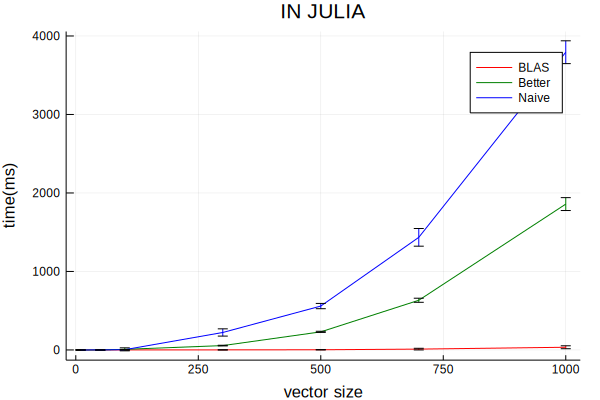

In [112]:
using Plots
plot(df2[:Size],df2[:3], group = df2[:2], yerr = df2[:Std], colour = [:red :green :blue],
     xlabel = "vector size", ylabel="time(ms)", title="IN JULIA")

# Zad2

2.Napisać w języku C:

- naiwną metodę mnożenia macierzy (wersja 1) 
- ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
- skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 

Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <time.h>

double PERMILI = CLOCKS_PER_SEC/1000;

void naive_multiplication(double** A, double** B, int n){
double** C = malloc(n * sizeof * C);
        for (int m=0; m<n; m++){
        C[m] = malloc(n * sizeof *C[m]);
        }
    for(int i = 0; i< n; i++)
            C[i][i] = 0;
clock_t t = clock();
  for (int j=0; j < n; j++)
    for (int k=1; k < n; k++)
        for (int i=1; i < n; i++)
           C[i][j]=C[i][j]+A[i][k]*B[k][j];
t = clock() - t;
double time_taken = ((double)t)/PERMILI;
printf("%f", time_taken);
}

void better_multiplication(double** A, double** B, int n){
double** C = malloc(n * sizeof * C);
        for (int m=0; m<n; m++){
        C[m] = malloc(n * sizeof *C[m]);
        }
    for(int i = 0; i< n; i++)
            C[i][i] = 0;

clock_t t = clock();
  for (int i=0; i < n; i++)
    for (int j=1; j < n; j++)
        for (int k=1; k < n; k++)
           C[i][j]=C[i][j]+A[i][k]*B[k][j];
t = clock() - t;
    double time_taken = ((double)t)/PERMILI;
    printf("%f", time_taken);
}

void blas_multiplication(int n){
    gsl_matrix *A = gsl_matrix_alloc(n,n);
    gsl_matrix *B = gsl_matrix_alloc(n,n);
    gsl_matrix *C = gsl_matrix_alloc(n,n);
    for(int i = 0; i < n; i++){
    for(int j = 0; j < n; j++){
        gsl_matrix_set(A, i, j, 1.03*i*j);
        gsl_matrix_set(B, i, j, 2.03*i*j);

   }
    }
    clock_t t = clock();
    gsl_blas_dgemm (CblasNoTrans, CblasNoTrans,
                  1.0, A, B,
                  0.0, C);
    t = clock() - t;
    double time_taken = ((double)t)/PERMILI;
    printf("%f", time_taken);
    gsl_matrix_free(A);
    gsl_matrix_free(B);
    gsl_matrix_free(C);
}

int main (void)
{
    // printf("Size;Type;Probe1;Probe2;Probe3;Probe4;Probe5;Probe6;Probe7;Probe8;Probe9;Probe10");
    for(int i = 1000; i<1001; i+=200 ){
        double** A= malloc(i * sizeof * A);
        for (int m=0; m<i; m++){
        A[m] = malloc(i * sizeof *A[m]);
        }
        double**B = malloc(i * sizeof * B);
        for (int m=0; m<i; m++){
        B[m] = malloc(i * sizeof *B[m]);
        }
        for(int k = 0; k<i; k++){
            A[k][k] = k*i*0.74;
            B[k][k] = k*i*0.68;
        }
        printf("\n%i;Naive",i);
        for(int k = 0; k<10; k++){
            printf(";");
            naive_multiplication(A,B,i); 
        }
        printf("\n%i;Better",i);
        for(int k = 0; k<10; k++){
            printf(";");
            better_multiplication(A,B,i);
        }
        printf("\n%i;BLAS",i);
        for(int k = 0; k<10; k++){
            printf(";");
            blas_multiplication(i);
        }
    }

    // for(int i = 1000; i<10000; i+=2500 ){
    //     double** A= malloc(i * sizeof * A);
    //     for (int m=0; m<i; m++){
    //     A[m] = malloc(i * sizeof *A[m]);
    //     }
    //     double**B = malloc(i * sizeof * B);
    //     for (int m=0; m<i; m++){
    //     B[m] = malloc(i * sizeof *B[m]);
    //     }
    //     for(int k = 0; k<i; k++){
    //         A[k][k] = k*i*0.74;
    //         B[k][k] = k*i*0.68;
    //     }
    //     printf("\n%i;Naive",i);
    //     for(int k = 0; k<10; k++){
    //         printf(";");
    //         naive_multiplication(A,B,i); 
    //     }
    //     printf("\n%i;Better",i);
    //     for(int k = 0; k<10; k++){
    //         printf(";");
    //         better_multiplication(A,B,i);
    //     }
    //     printf("\n%i;BLAS",i);
    //     for(int k = 0; k<10; k++){
    //         printf(";");
    //         blas_multiplication(i);
    //     }
    // }
}


In [21]:
using CSV
df3 = CSV.read("lab32a.csv", delim=";")



,Size,Type,Probe1,Probe2,Probe3,Probe4,Probe5,Probe6,Probe7,Probe8,Probe9,Probe10
,Int64⍰,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,10,Naive,0.011,0.01,0.009,0.011,0.009,0.009,0.009,0.011,0.009,0.009
2,10,Better,0.01,0.01,0.009,0.009,0.009,0.009,0.009,0.008,0.009,0.009
3,10,BLAS,0.01,0.003,0.002,0.003,0.003,0.002,0.002,0.003,0.003,0.002
4,210,Naive,88.222,86.632,83.488,82.867,83.093,82.659,83.001,83.045,83.299,83.97
5,210,Better,72.726,82.242,72.652,72.682,72.906,72.446,72.64,72.493,72.412,72.534
6,210,BLAS,9.201,9.215,9.33,9.264,9.197,9.182,9.272,9.245,9.188,9.256
7,410,Naive,1003.35,1030.12,1087.24,969.854,1100.51,982.586,1055.38,1018.39,992.579,1104.34
8,410,Better,583.261,578.311,581.013,578.26,589.273,576.922,575.68,577.038,601.695,587.743
9,410,BLAS,67.615,67.612,67.722,69.192,67.718,67.64,70.46,68.006,68.05,67.943


In [22]:
using Statistics
using DataFrames
A=Float64[]
B=Float64[]

for i = 1:15
    push!(A,mean(df3[i,3:12]))
    push!(B,std(df3[i,3:12]))
    
end
df4=DataFrame()
df4[:Size]= df3[:Size]
df4[:Type]=df3[:Type]
df4[:TimeMean]=A
df4[:Std]=B

15-element Array{Float64,1}:
  0.0009486832980505135
  0.0005676462121975474
  0.002406010991015812 
  1.8653024896187005   
  3.0494159750497993   
  0.04689705036922157  
 49.81515641471198     
  8.06794411648139     
  0.923763413674977    
 44.06749153098399     
  8.9641988952349      
  3.4993950905835156   
 47.35445437466492     
 27.786880042566835    
 34.96853029050234     

In [26]:
df4

,Size,Type,TimeMean,Std
,Int64⍰,String⍰,Float64,Float64
1,10,Naive,0.0097,0.000948683
2,10,Better,0.0091,0.000567646
3,10,BLAS,0.0033,0.00240601
4,210,Naive,84.0276,1.8653
5,210,Better,73.5733,3.04942
6,210,BLAS,9.235,0.0468971
7,410,Naive,1034.44,49.8152
8,410,Better,582.92,8.06794
9,410,BLAS,68.1958,0.923763


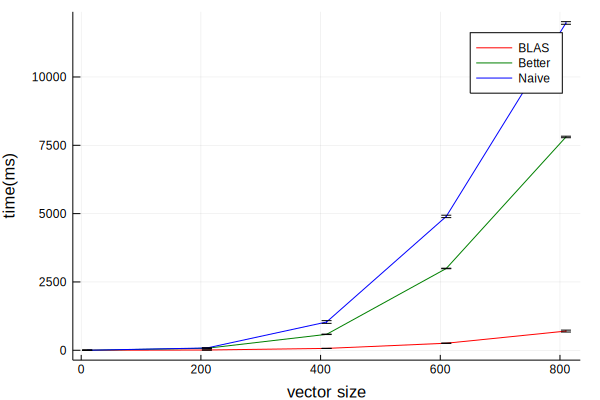

In [110]:
using Plots
plot(df4[:Size],df4[:3], group = df4[:2], yerr = df4[:Std], colour = [:red :green :blue],
     xlabel = "vector size", ylabel="time(ms)", title="IN C")

3.Użyć funkcji polyfit z pakietu Polynomials do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych wykresów.

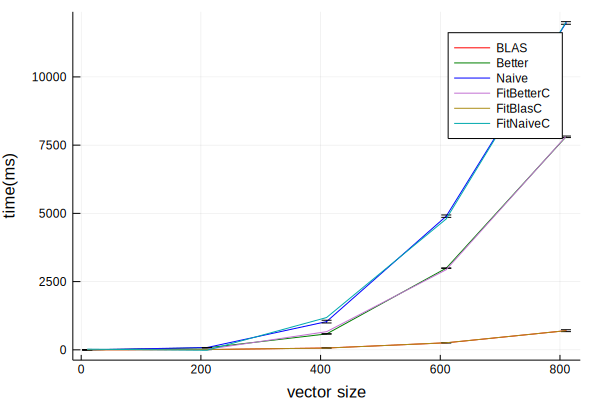

In [111]:
using Polynomials
#NAIVE C
x = collect(1:3:15); xs = map(x->df4[x,:Size],x) ;ys = map(x->df4[x,:TimeMean], x)
fitNaiveC=polyfit(xs, ys,3)

#BETTER C
xb = collect(2:3:15); xsb = map(x->df4[x,:Size],xb); ysb = map(x->df4[x,:TimeMean], xb)
fitBetterC=polyfit(xsb, ysb,3)

#BLAS C
xblas = collect(3:3:15); xsblas = map(x->df4[x,:Size],xblas); ysblas = map(x->df4[x,:TimeMean], xblas)
fitBlasC=polyfit(xsblas, ysblas,3)


Means= Float64[]
Types=Any[]
for i in [10,210,410,610,810]
    push!(Means,polyval(fitNaiveC, i))
    push!(Types, "FitNaiveC")
    push!(Means,polyval(fitBetterC, i))
    push!(Types, "FitBetterC")
    push!(Means,polyval(fitBlasC, i))
    push!(Types, "FitBlasC")
end

df5 = DataFrame()
df5[:Size]=df4[:Size]
df5[:Types]= Types
df5[:Measures] = Means
df5
plot!(df5[:Size],df5[:Measures], groups=df5[:Types])




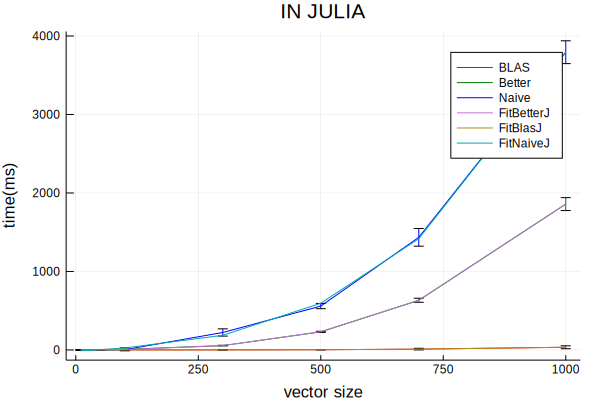

In [115]:
using Plots
plot(df2[:Size],df2[:3], group = df2[:2], yerr = df2[:Std], colour = [:red :green :blue],
     xlabel = "vector size", ylabel="time(ms)", title="IN JULIA")

using Polynomials
#NAIVE C
x = collect(1:3:21); xs = map(x->df2[x,:Size],x) ;ys = map(x->df2[x,:TimeMean], x)
fitNaiveC=polyfit(xs, ys,3)

#BETTER C
xb = collect(2:3:21); xsb = map(x->df2[x,:Size],xb); ysb = map(x->df2[x,:TimeMean], xb)
fitBetterC=polyfit(xsb, ysb,3)

#BLAS C
xblas = collect(3:3:21); xsblas = map(x->df2[x,:Size],xblas); ysblas = map(x->df2[x,:TimeMean], xblas)
fitBlasC=polyfit(xsblas, ysblas,3)


Means= Float64[]
Types=Any[]
for i in [10,50,100,300,500,700,1000]
    push!(Means,polyval(fitNaiveC, i))
    push!(Types, "FitNaiveJ")
    push!(Means,polyval(fitBetterC, i))
    push!(Types, "FitBetterJ")
    push!(Means,polyval(fitBlasC, i))
    push!(Types, "FitBlasJ")
end

df6 = DataFrame()
df6[:Size]=df2[:Size]
df6[:Types]= Types
df6[:Measures] = Means
df6
plot!(df6[:Size],df6[:Measures], groups=df6[:Types])